In [147]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')


In [148]:
mnist       #70000张28*28*1的灰度图
X,y=mnist['data'],mnist['target']
print(X.shape)
# y是标签，X是像素信息


(70000, 784)


## 划分数据集
1. 

In [149]:
# 打乱数据集
shuffle_index=np.random.permutation(70000)
X,y=X.iloc[shuffle_index],y.iloc[shuffle_index]

In [150]:
# 划分数据
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]


## 交叉验证
1. 接下来我们用一个二分类的例子做交叉验证，我们二分类的依据为图片的类别是否为5；我们先用布尔索引方式把二分类的训练集的结果算出来，然后用.fit来跑出模型的参数，用样本集来交叉检验评估模型性能，在用验证集查看准确率
2. 在上面的操作中，模型在fit的时候已经固定了，参数由样本集确认

In [151]:
y_5=(y=='5')
y_train_5=(y_train=='5')
y_test_5=(y_test=='5')

# 随机梯度下降实现的一个分类器
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(max_iter=5)           # max_iter是最大迭代次数
sgd_clf.fit(X_train,y_train_5)

/Users/linshangjin/Desktop/python/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=5)

In [153]:
# 这个函数是用来机器学习的评估模型特征值
from sklearn.model_selection import cross_val_score
Accuracy=cross_val_score(sgd_clf,                # 分类器
                        X_train,
                        y_train_5,
                        cv=3,                  # cv是把样本切成几份，每次取一份为验证集
                        scoring='accuracy')     # 返回正确率
print(Accuracy)

# 用验证集来泡一下模型看是否准确
y_test_output=sgd_clf.predict(X_test)
Accuracy=sum(y_test_output==y_test_5)/len(y_test)
print(Accuracy)

/Users/linshangjin/Desktop/python/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/linshangjin/Desktop/python/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[0.9651  0.95955 0.95945]
0.9621


/Users/linshangjin/Desktop/python/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


下面我们用StratifiedKFold手动做一个交叉验证，这个函数是专门用来分割数据的，随机取等数量样本分成多酚

In [134]:
# sklearn中专门用来交叉验证的函数
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds=StratifiedKFold(n_splits=5,shuffle=True)     # 数据拆分成几份

for train_index,test_index in skfolds.split(X_train,y_train):
    clone_clf=clone(sgd_clf)        #复制一个分类器

    X_train_folds=X_train.iloc[train_index]
    y_train_folds=y_train_5.iloc[train_index]
    X_test_folds=X_train.iloc[test_index]
    y_test_folds=y_train_5.iloc[test_index]

    clone_clf.fit(X_train_folds,y_train_folds)      # 训练模型
    y_pred=clone_clf.predict(X_test_folds)          # 用模型预测验证集的结果
    Accuracy=sum(y_pred==y_test_folds)/len(y_pred)  # 计算准确率
    print(Accuracy)


/Users/linshangjin/Desktop/python/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.9659166666666666


/Users/linshangjin/Desktop/python/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.9443333333333334


/Users/linshangjin/Desktop/python/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.9684166666666667


/Users/linshangjin/Desktop/python/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.9713333333333334
0.9614166666666667


/Users/linshangjin/Desktop/python/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


## 混淆矩阵
1. TN、FP、FN、TP
2. 精度precision=TP/(TP+FP)
    召回率recall=TP/(TP+FN)
3. F1 上面两个指标的一个调和平均数，综合考虑两个指标

In [154]:
# 这个函数返回最终的预测值，就每次交叉验证都能对训练集里面的部分样本预测，所有交叉验证完成之后所有样本值都有一个预测值
from sklearn.model_selection import cross_val_predict
y_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)


# 专门计算混淆矩阵
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_pred)

/Users/linshangjin/Desktop/python/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/linshangjin/Desktop/python/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/linshangjin/Desktop/python/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([[53865,   761],
       [ 1595,  3779]])

In [156]:
from sklearn import metrics
# 计算准确率
print(metrics.accuracy_score(y_train_5,y_pred))
# 计算精度
print(metrics.precision_score(y_train_5,y_pred))
# 计算召回率
print(metrics.recall_score(y_train_5,y_pred))
# 计算F1分数
print(metrics.f1_score(y_train_5,y_pred))

0.9607333333333333
0.8323788546255506
0.7032005954596204
0.7623562638692758


## 分类阈值

In [163]:
# 这个函数可以查询在当前参数下每个样本的分数
y_score=sgd_clf.decision_function(X_train)
print(y_score)

[-206578.11000361 -500139.11851194 -222494.57484237 ... -379572.57177923
 -284411.82373688 -116296.34827019]


In [165]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_score)
# 阈值的可能取值，其实就是所有出现过的分数
print(thresholds.shape)

(59999,)

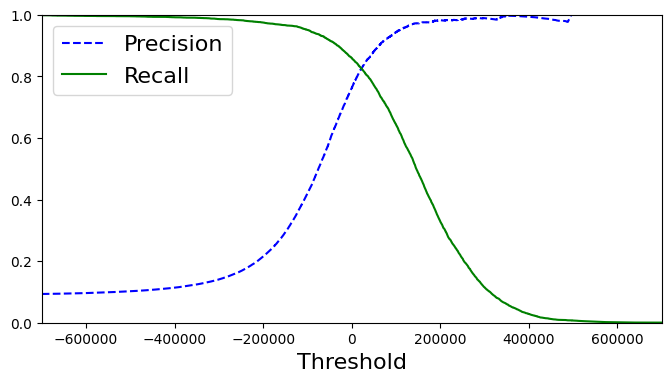

In [166]:
# 随着阈值的选择，模型的精度和召回率会变化
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):  
    plt.plot(thresholds,  
             precisions[:-1],  
             "b--",  
             label="Precision")  

    plt.plot(thresholds,  
             recalls[:-1],  
             "g-",  
             label="Recall")  
    plt.xlabel("Threshold", fontsize=16)  
    plt.legend(loc="upper left", fontsize=16)  
    plt.ylim([0, 1])  

plt.figure(figsize=(8, 4))  
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)  
plt.xlim([-700000, 700000])  
plt.show()

## 如何选择阈值
roc曲线，一般只用于分类问题,

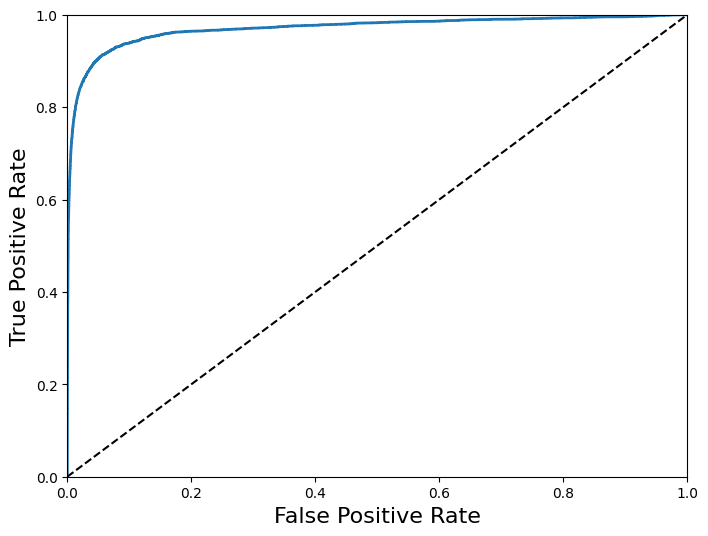

In [173]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_train_5,y_score)


def plot_roc_curve(fpr, tpr, label=None):  
    plt.plot(fpr, tpr, linewidth=2, label=label)  
    plt.plot([0, 1], [0, 1], 'k--')  
    plt.axis([0, 1, 0, 1])  
    plt.xlabel('False Positive Rate', fontsize=16)  
    plt.ylabel('True Positive Rate', fontsize=16)  

plt.figure(figsize=(8, 6))  
plot_roc_curve(fpr, tpr)  
plt.show()

* AUC值：表示曲线下方的面积，这个面积越大越好
* 意义在于：我们考虑不同阈值时，通过比较这个面积得知那个阈值更好

In [174]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train_5,y_score))

0.9703790355395818
